# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observations and Comments: 

There are more cities in the sample population located in the Northern Hemisphere then Southern Hemisphere. 

As shown in the longitude vs latitude png file, one is able to content shapes. There appears to be a correlation between latitude and temperature. For the Southern Hemisphere, there appears to be a linear correlation from 0 degrees (equator) and as one moves South the temperature decreases. In the case of the Northern Hemisphere, a similar trend starts at ~20 degrees  and as one moves North  the temperature decreases. Likewise, in the Northern hemisphere the temperature between 0 – 20 degrees North latitude appears to be in the similar range, which can be explained by it being summer in the Northern latitudes. 

Humidity is not directly impacted by latitude and can be impacted by proximity to oceans, climate, altitude, etc. 

There appears to be no correlations between cloudiness and latitude / proximity to the equator. More impacted / influenced by geographical location and daily weather. 
 
Windspeeds for most cities are between 0 – 15 mph. Anything above 15 mph appears to be an outlier which may indicate a storm / severe weather effect. 



In [1]:
# Import dependencies

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import json
import requests
import scipy.stats as st
import requests as req
import pandas as pd
from pprint import pprint
from datetime import datetime
from citipy import citipy
    
# API Keys needed
from api_keys import weather_api_key
from api_keys import g_key

## Generate Cities List

In [2]:
# Number of random numbers to be generated
y = 1500

# For instance, latitude, or y, values are between -90 and +90
# Randmoly generate latitude coordinates. For Y numbers. 
city_data = pd.DataFrame()
city_data['random_latitude'] = [np.random.uniform(-90,90) for i in range (y)]

# For instance, longitude, or x, values are between -180 and +180
# Randomly generate langitude coordinates. For Y numbers. 
city_data['random_longitude'] = [np.random.uniform(-180,180) for i in range (y)]

# city_data.head()


In [3]:
closest_city = []
host_country = []
latitude = []
longitude = []

# Find the closest city
for index,row in city_data.iterrows():
    lat = row['random_latitude']
    long = row['random_longitude']
    city = citipy.nearest_city(lat, long).city_name
    country = citipy.nearest_city(lat, long).country_code
    
# Review and drop any duplicate cities due to random lat / long proximity.
    if city not in closest_city:
        closest_city.append(city)
        host_country.append(country)
        latitude.append(lat)
        longitude.append(long)

# Creating dataframe and formatting
closest_city = [x.upper() for x in closest_city]
host_country = [x.upper() for x in host_country]
summary_df=pd.DataFrame({"Random Latitude": latitude, "Random Longitude": longitude, "Closest City": closest_city, 
                         "Country": host_country})
summary_df.head()

,Random Latitude,Random Longitude,Closest City,Country
0,40.926072,-130.002981,EUREKA,US
1,15.725207,66.443747,VERAVAL,IN
2,-68.004745,-124.911588,RIKITEA,PF
3,-27.811405,-23.942429,VILA VELHA,BR
4,-74.248252,-66.509573,USHUAIA,AR


In [4]:
 # Confirm the number of cities is greater than 500
len(closest_city)

570

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [6]:
# Create lists for different response information
weather_city = []
weather_country =[]
weather_date=[]
weather_country = []
weather_latitude = []
weather_longitude = []
weather_temperature_F = []
weather_humidity_percent = []
weather_cloudiness_percent = []
weather_wind_speed_mph = []

x = 1

# Build query for different cities. 

print(' ')
print('Start of Records')
print(' ')

for city in closest_city:
        query_url = url + "appid=" + weather_api_key + "&q=" + city +"&units=" + units 
        print(f'Retrieving information for {city}. City number {x} of {len(closest_city)}.')
        print(query_url)
        
# Get Weather Data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

# Collect the requested information
        try:
            weather_city.append(weather_json['name'])
            weather_country.append(weather_json['sys']['country'])
            weather_date.append(weather_json['dt'])
            weather_latitude.append(weather_json['coord']['lat'])
            weather_longitude.append(weather_json['coord']['lon'])
            weather_temperature_F.append(weather_json['main']['temp_max'])
            weather_humidity_percent.append(weather_json['main']['humidity'])
            weather_cloudiness_percent.append(weather_json['clouds']['all'])
            weather_wind_speed_mph.append(weather_json['wind']['speed'])

            x = x + 1
            print(' ')

# Capture when city is not found
        except:
            print(f'{city} was not Found')
            print(' ')
            x = x + 1 
            print(' ')

# Timer to pause for a second after each record - not too exceed 60 API calls per minute limit
        time.sleep(1)
            
print(' ')
print('End of Records')
print(' ')

 
Start of Records
 
Retrieving information for EUREKA. City number 1 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=EUREKA&units=imperial
 
Retrieving information for VERAVAL. City number 2 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=VERAVAL&units=imperial
 
Retrieving information for RIKITEA. City number 3 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=RIKITEA&units=imperial
 
Retrieving information for VILA VELHA. City number 4 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=VILA VELHA&units=imperial
 
Retrieving information for USHUAIA. City number 5 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=USHUAIA&units=imperial
 
Retrieving information for DAMIETTA. City number 6 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05

Retrieving information for MOUNT ISA. City number 48 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=MOUNT ISA&units=imperial
 
Retrieving information for BLACK RIVER. City number 49 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=BLACK RIVER&units=imperial
 
Retrieving information for CHOKURDAKH. City number 50 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=CHOKURDAKH&units=imperial
 
Retrieving information for KAITANGATA. City number 51 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=KAITANGATA&units=imperial
 
Retrieving information for TUKTOYAKTUK. City number 52 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=TUKTOYAKTUK&units=imperial
 
Retrieving information for ATUONA. City number 53 of 570.
http://api.openweathermap.org/data/2.5/weather?app

 
Retrieving information for CHAPAIS. City number 95 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=CHAPAIS&units=imperial
 
Retrieving information for EAST LONDON. City number 96 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=EAST LONDON&units=imperial
 
Retrieving information for SAMARAI. City number 97 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=SAMARAI&units=imperial
 
Retrieving information for FAYA. City number 98 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=FAYA&units=imperial
 
Retrieving information for BETHEL. City number 99 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=BETHEL&units=imperial
 
Retrieving information for BARENTSBURG. City number 100 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dc

 
Retrieving information for IMBITUBA. City number 141 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=IMBITUBA&units=imperial
 
Retrieving information for BADA. City number 142 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=BADA&units=imperial
 
Retrieving information for DARU. City number 143 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=DARU&units=imperial
 
Retrieving information for ORANJESTAD. City number 144 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=ORANJESTAD&units=imperial
 
Retrieving information for BANYO. City number 145 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=BANYO&units=imperial
 
Retrieving information for CASTRO. City number 146 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c5

Retrieving information for DUBBO. City number 188 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=DUBBO&units=imperial
 
Retrieving information for VYSOKOGORNYY. City number 189 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=VYSOKOGORNYY&units=imperial
 
Retrieving information for MOOSE FACTORY. City number 190 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=MOOSE FACTORY&units=imperial
 
Retrieving information for JALU. City number 191 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=JALU&units=imperial
 
Retrieving information for CODRINGTON. City number 192 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=CODRINGTON&units=imperial
 
Retrieving information for SAO JOAO DA BARRA. City number 193 of 570.
http://api.openweathermap.org/data/2.5/weather?

Retrieving information for JOS. City number 235 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=JOS&units=imperial
 
Retrieving information for PRAIA. City number 236 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=PRAIA&units=imperial
 
Retrieving information for EGVEKINOT. City number 237 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=EGVEKINOT&units=imperial
 
Retrieving information for SANTA ROSA DE OSOS. City number 238 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=SANTA ROSA DE OSOS&units=imperial
 
Retrieving information for DICKINSON. City number 239 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=DICKINSON&units=imperial
 
Retrieving information for BANDA ACEH. City number 240 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5

Retrieving information for GUMDAG. City number 282 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=GUMDAG&units=imperial
 
Retrieving information for BULUNGU. City number 283 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=BULUNGU&units=imperial
 
Retrieving information for GUERRERO NEGRO. City number 284 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=GUERRERO NEGRO&units=imperial
 
Retrieving information for LENSK. City number 285 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=LENSK&units=imperial
 
Retrieving information for CHERSKIY. City number 286 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=CHERSKIY&units=imperial
 
Retrieving information for MAREEBA. City number 287 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154d

 
Retrieving information for NIQUELANDIA. City number 329 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=NIQUELANDIA&units=imperial
 
Retrieving information for JESUP. City number 330 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=JESUP&units=imperial
 
Retrieving information for EL WASTA. City number 331 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=EL WASTA&units=imperial
EL WASTA was not Found
 
 
Retrieving information for XINING. City number 332 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=XINING&units=imperial
 
Retrieving information for SKJERVOY. City number 333 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=SKJERVOY&units=imperial
 
Retrieving information for KAKA. City number 334 of 570.
http://api.openweathermap.org/data/2.5/weathe

 
Retrieving information for BEYNEU. City number 375 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=BEYNEU&units=imperial
 
Retrieving information for SADASIVPET. City number 376 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=SADASIVPET&units=imperial
 
Retrieving information for ARENAPOLIS. City number 377 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=ARENAPOLIS&units=imperial
 
Retrieving information for KONTAGORA. City number 378 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=KONTAGORA&units=imperial
 
Retrieving information for HERVEY BAY. City number 379 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=HERVEY BAY&units=imperial
 
Retrieving information for BENGKULU. City number 380 of 570.
http://api.openweathermap.org/data/2.5/weather?appid

Retrieving information for TOMRA. City number 422 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=TOMRA&units=imperial
 
Retrieving information for VITRE. City number 423 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=VITRE&units=imperial
 
Retrieving information for ILULISSAT. City number 424 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=ILULISSAT&units=imperial
 
Retrieving information for PORT MORESBY. City number 425 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=PORT MORESBY&units=imperial
 
Retrieving information for XIONGYUE. City number 426 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=XIONGYUE&units=imperial
 
Retrieving information for PLOEMEUR. City number 427 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de

 
Retrieving information for MIANDRIVAZO. City number 469 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=MIANDRIVAZO&units=imperial
 
Retrieving information for VICENTE GUERRERO. City number 470 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=VICENTE GUERRERO&units=imperial
 
Retrieving information for BORBA. City number 471 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=BORBA&units=imperial
 
Retrieving information for NGUIU. City number 472 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=NGUIU&units=imperial
NGUIU was not Found
 
 
Retrieving information for SARYSHAGAN. City number 473 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=SARYSHAGAN&units=imperial
SARYSHAGAN was not Found
 
 
Retrieving information for PUERTO DEL ROSARIO. City number 4

 
Retrieving information for ASMAR. City number 515 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=ASMAR&units=imperial
 
Retrieving information for GISBORNE. City number 516 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=GISBORNE&units=imperial
 
Retrieving information for BAIQUAN. City number 517 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=BAIQUAN&units=imperial
 
Retrieving information for ABONNEMA. City number 518 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=ABONNEMA&units=imperial
 
Retrieving information for ITAREMA. City number 519 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=ITAREMA&units=imperial
 
Retrieving information for GUSHIKAWA. City number 520 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab2

 
Retrieving information for ORMARA. City number 562 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=ORMARA&units=imperial
 
Retrieving information for KARASJOK. City number 563 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=KARASJOK&units=imperial
 
Retrieving information for GUARANDA. City number 564 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=GUARANDA&units=imperial
 
Retrieving information for VISP. City number 565 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=VISP&units=imperial
 
Retrieving information for HUALMAY. City number 566 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dca3a810c51a3&q=HUALMAY&units=imperial
 
Retrieving information for STREZHEVOY. City number 567 of 570.
http://api.openweathermap.org/data/2.5/weather?appid=5a8b6e05154de2bab21dc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create DataFrame.

city_weather = pd.DataFrame({"City": weather_city, "Latitude": weather_latitude, "Longitude": weather_longitude,
                             "Max Temperature (F)": weather_temperature_F, "Humidity (%)": weather_humidity_percent,
                             "Cloudiness": weather_cloudiness_percent, "Wind Speed": weather_wind_speed_mph, 
                            "Country": weather_country, "Date":weather_date})
city_weather.head(25)

,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness,Wind Speed,Country,Date
0,Eureka,40.80,-124.16,63.00,100,97,1.12,US,1600350659
1,Verāval,20.90,70.37,82.17,78,94,10.83,IN,1600350870
2,Rikitea,-23.12,-134.97,71.94,82,94,21.63,PF,1600350871
3,Vila Velha,-20.33,-40.29,81.00,57,20,16.11,BR,1600350642
4,Ushuaia,-54.80,-68.30,37.40,59,75,39.15,AR,1600350873
5,Damietta,31.42,31.81,86.00,70,0,11.41,EG,1600350875
6,Cape Town,-33.93,18.42,71.01,55,0,6.93,ZA,1600350876
7,Chunskiy,56.08,99.63,50.81,80,86,5.77,RU,1600350877
8,Yellowknife,62.46,-114.35,34.00,81,20,2.24,CA,1600350879
9,Kieta,-6.22,155.63,78.93,84,100,9.48,PG,1600350880


In [8]:
# Check to make sure each column is complete
city_weather.count()

City                   531
Latitude               531
Longitude              531
Max Temperature (F)    531
Humidity (%)           531
Cloudiness             531
Wind Speed             531
Country                531
Date                   531
dtype: int64

In [38]:
# Create a CSV File
city_weather.to_csv("City_Weather_Dataframe.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [39]:
humidity_check = pd.DataFrame(city_weather.groupby('City')['Humidity (%)'].max())
humidity_check = humidity_check.sort_values("Humidity (%)", ascending = False)
humidity_check.head(20)

,Humidity (%)
City,
Aklavik,100
Eureka,100
Port Hardy,100
Esperance,100
Lompoc,100
Mackenzie,100
Campbell River,100
Klaksvík,100
Norman Wells,100


In [40]:
#  Get the indices of cities that have humidity over 100%.

# Based on the above table, no city has humidity greater than 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

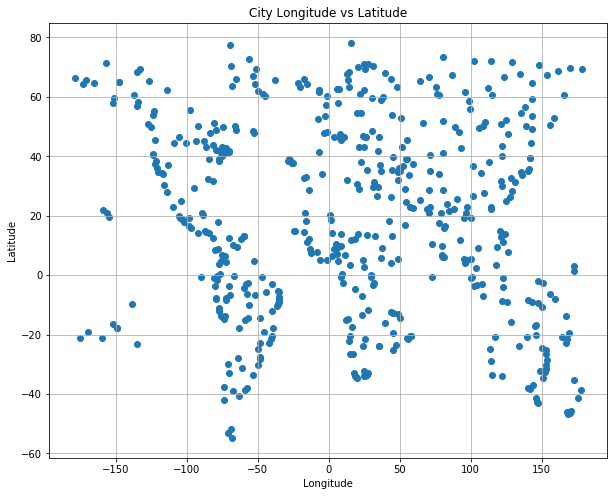

In [62]:
# Generate scatter plot
plt.figure(figsize=(10,8))
plt.scatter(city_weather['Longitude'], city_weather['Latitude'])
plt.title("City Longitude vs Latitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show
plt.savefig('Longitude_Latitude2.png', bbox_inches='tight')

## Latitude vs. Temperature Plot

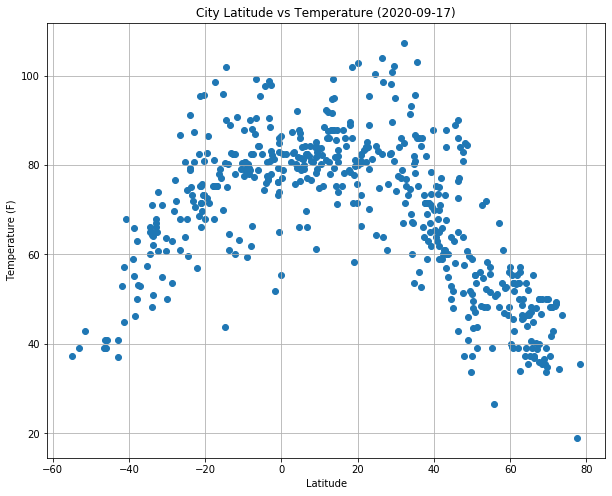

In [63]:
date = datetime.fromtimestamp(city_weather.loc[0,"Date"]).strftime('%Y-%m-%d')

# Generate scatter plot
plt.figure(figsize=(10,8))
plt.scatter(city_weather['Latitude'], city_weather['Max Temperature (F)'])
plt.title("City Latitude vs Temperature (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)
plt.show
plt.savefig('Latitude_Temperature2.png', bbox_inches='tight')


## Latitude vs. Humidity Plot

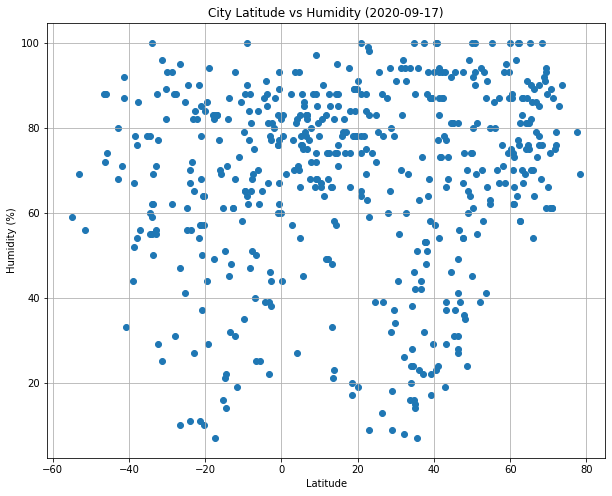

In [64]:
# Generate scatter plot
plt.figure(figsize=(10,8))
plt.scatter(city_weather['Latitude'], city_weather['Humidity (%)'])
plt.title("City Latitude vs Humidity (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.show
plt.savefig('Latitude_Humidity2.png', bbox_inches='tight')


## Latitude vs. Cloudiness Plot

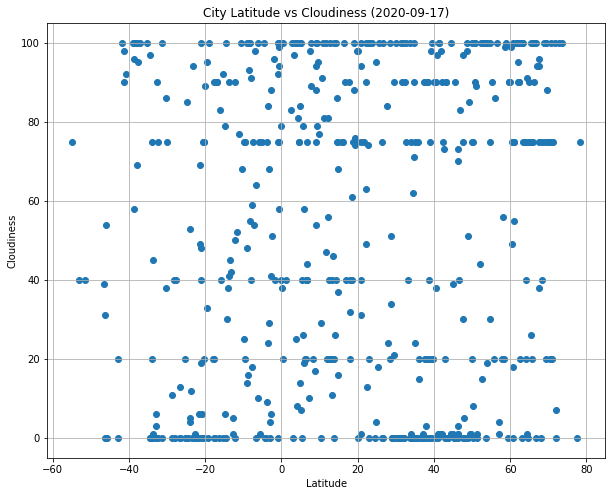

In [65]:
# Generate scatter plot
plt.figure(figsize=(10,8))
plt.scatter(city_weather['Latitude'], city_weather['Cloudiness'])
plt.title("City Latitude vs Cloudiness (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.show
plt.savefig('Latitude_Cloudiness2.png', bbox_inches='tight')

## Latitude vs. Wind Speed Plot

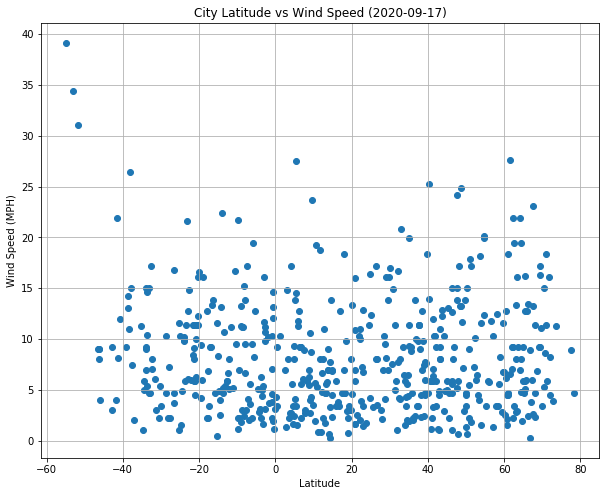

In [66]:
# Generate scatter plot
plt.figure(figsize=(10,8))
plt.scatter(city_weather['Latitude'], city_weather['Wind Speed'])
plt.title("City Latitude vs Wind Speed (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True)
plt.show
plt.savefig('Latitude_WindSpeed2.png', bbox_inches='tight')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [67]:
# Northern Hemisphere 
# Data for X-Axis (Latitude)
# Northern hemisphere greater than or equal to 0 degrees. Southern hemisphere less than 0 degrees.
latitude_north_df = city_weather[(city_weather["Latitude"]>=0)]
latitude_north_df.head()

,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness,Wind Speed,Country,Date
0,Eureka,40.80,-124.16,63.00,100,97,1.12,US,1600350659
1,Verāval,20.90,70.37,82.17,78,94,10.83,IN,1600350870
5,Damietta,31.42,31.81,86.00,70,0,11.41,EG,1600350875
7,Chunskiy,56.08,99.63,50.81,80,86,5.77,RU,1600350877
8,Yellowknife,62.46,-114.35,34.00,81,20,2.24,CA,1600350879


The r-squared is: 0.63


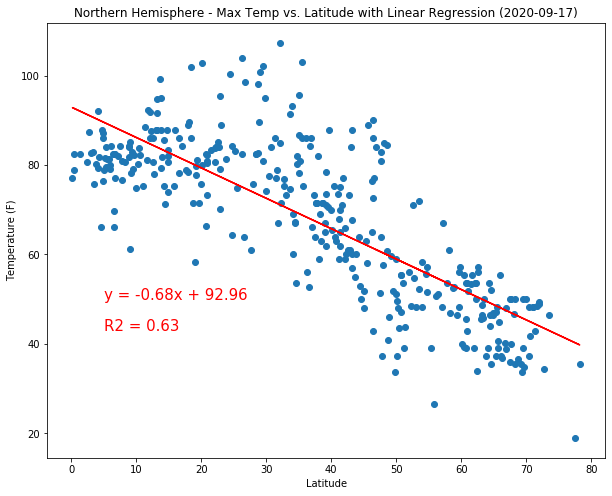

The correlation between Latitude and Temperature is: -0.794


In [68]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

# Data for X-Axis (latitude)
northern_latitude_axis = latitude_north_df.groupby(latitude_north_df["City"])["Latitude"].mean()
northern_latitude_axis

# Data for Y-axis (Max Temp)
northern_temperature_axis = latitude_north_df.groupby(latitude_north_df["City"])["Max Temperature (F)"].mean()
northern_temperature_axis

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(northern_latitude_axis, northern_temperature_axis)

# Calculate the predictions for each value of x (latitude)
regression_values = northern_latitude_axis * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
plt.figure(figsize=(10,8))
plt.scatter(northern_latitude_axis, northern_temperature_axis)

# Plot the regression line
plt.plot(northern_latitude_axis, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (5, 50), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (5, 43), fontsize=15, color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude with Linear Regression (" + date + ")")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

# Calculate the correlation coefficient
correlation = round(st.pearsonr(northern_latitude_axis, northern_temperature_axis)[0],3)
print(f"The correlation between Latitude and Temperature is: {correlation}")


In [69]:
# No strong correlation between latitude and temperature, but there is an obvious trend within the Northern Hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [70]:
# Southern Hemisphere
# Northern hemisphere greater than or equal to 0 degrees. Southern hemisphere less than 0 degrees.
latitude_south_df = city_weather[(city_weather["Latitude"]<0)]
latitude_south_df.head()


,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness,Wind Speed,Country,Date
2,Rikitea,-23.12,-134.97,71.94,82,94,21.63,PF,1600350871
3,Vila Velha,-20.33,-40.29,81.00,57,20,16.11,BR,1600350642
4,Ushuaia,-54.80,-68.30,37.40,59,75,39.15,AR,1600350873
6,Cape Town,-33.93,18.42,71.01,55,0,6.93,ZA,1600350876
9,Kieta,-6.22,155.63,78.93,84,100,9.48,PG,1600350880


The r-squared is: 0.496


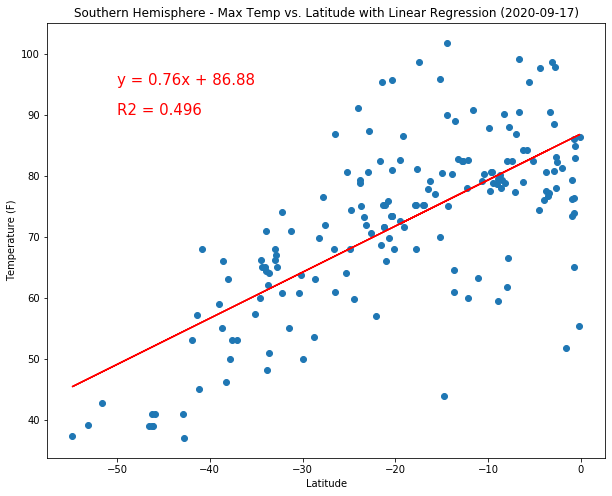

The correlation between Latitude and Temperature is: 0.705


In [71]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

# Data for X-Axis (latitude)
southern_latitude_axis = latitude_south_df.groupby(latitude_south_df["City"])["Latitude"].mean()
southern_latitude_axis

# Data for Y-axis (Max Temp)
southern_temperature_axis = latitude_south_df.groupby(latitude_south_df["City"])["Max Temperature (F)"].mean()
southern_temperature_axis

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(southern_latitude_axis, southern_temperature_axis)

# Calculate the predictions for each value of x (latitude)
regression_values = southern_latitude_axis * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
plt.figure(figsize=(10,8))
plt.scatter(southern_latitude_axis, southern_temperature_axis)

# Plot the regression line
plt.plot(southern_latitude_axis, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-50, 95), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (-50, 90), fontsize=15, color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude with Linear Regression (" + date + ")")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

# Calculate the correlation coefficient
correlation = round(st.pearsonr(southern_latitude_axis, southern_temperature_axis)[0],3)
print(f"The correlation between Latitude and Temperature is: {correlation}")


In [72]:
# Similar to the Northern Hemsiphere, within the Southern Hemisphere there is a trend as between temperature 
# and latitude and as one moves away from the equator the temperature becomes cooler.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.007


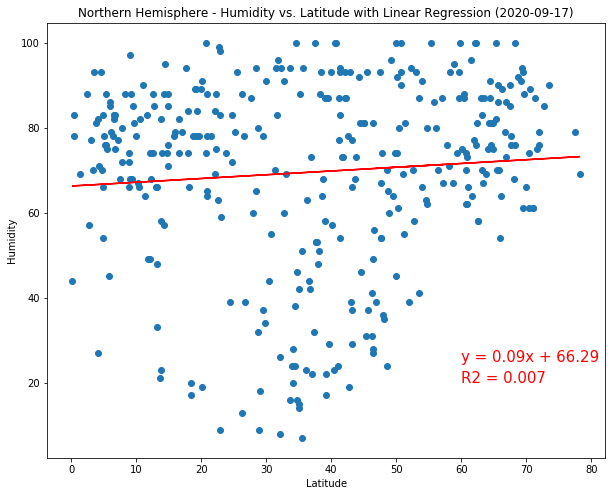

The correlation between Latitude and Humidity is: 0.083


In [74]:
# Northern Hemisphere - Humidity vs. Latitude Linear Regression

# Data for X-Axis (latitude)
northern_latitude_axis = latitude_north_df.groupby(latitude_north_df["City"])["Latitude"].mean()
northern_latitude_axis

# Data for Y-axis (Humidity)
northern_humidity_axis = latitude_north_df.groupby(latitude_north_df["City"])["Humidity (%)"].mean()
northern_humidity_axis

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(northern_latitude_axis, northern_humidity_axis)

# Calculate the predictions for each value of x (latitude)
regression_values = northern_latitude_axis * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
plt.figure(figsize=(10,8))
plt.scatter(northern_latitude_axis, northern_humidity_axis)

# Plot the regression line
plt.plot(northern_latitude_axis, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (60, 25), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (60, 20), fontsize=15, color="red")
plt.title("Northern Hemisphere - Humidity vs. Latitude with Linear Regression (" + date + ")")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

# Calculate the correlation coefficient
correlation = round(st.pearsonr(northern_latitude_axis, northern_humidity_axis)[0],3)
print(f"The correlation between Latitude and Humidity is: {correlation}")


In [75]:
# There is no correlation with Humidity vs Latitude for the Northern Hemisphere. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.001


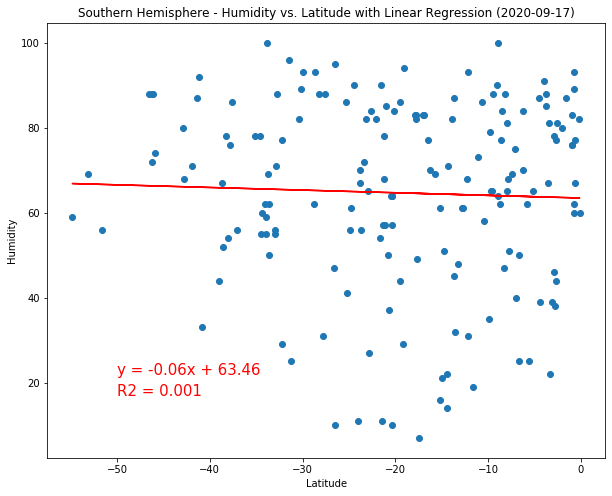

The correlation between Latitude and Humidity is: -0.038


In [76]:
# Southern Hemisphere - Humidity vs. Latitude Linear Regression

# Data for X-Axis (latitude)
southern_latitude_axis = latitude_south_df.groupby(latitude_south_df["City"])["Latitude"].mean()
southern_latitude_axis

# Data for Y-axis (Humidity)
southern_humidity_axis = latitude_south_df.groupby(latitude_south_df["City"])["Humidity (%)"].mean()
southern_humidity_axis

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(southern_latitude_axis, southern_humidity_axis)

# Calculate the predictions for each value of x (latitude)
regression_values = southern_latitude_axis * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
plt.figure(figsize=(10,8))
plt.scatter(southern_latitude_axis, southern_humidity_axis)

# Plot the regression line
plt.plot(southern_latitude_axis, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-50, 22), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (-50, 17), fontsize=15, color="red")
plt.title("Southern Hemisphere - Humidity vs. Latitude with Linear Regression (" + date + ")")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

# Calculate the correlation coefficient
correlation = round(st.pearsonr(southern_latitude_axis, southern_humidity_axis)[0],3)
print(f"The correlation between Latitude and Humidity is: {correlation}")


In [77]:
# There is no correlation with Humidity vs Latitude for the Southern Hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.002


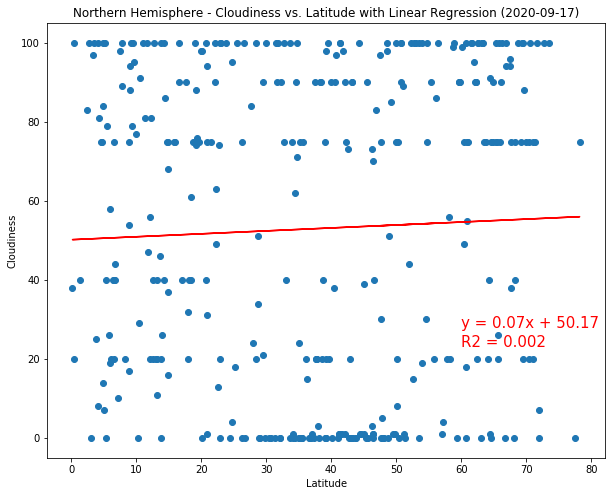

The correlation between Latitude and Cloudiness is: 0.039


In [78]:
# Northern Hemisphere - Cloudiness vs. Latitude Linear Regression

# Data for X-Axis (latitude)
northern_latitude_axis = latitude_north_df.groupby(latitude_north_df["City"])["Latitude"].mean()
northern_latitude_axis

# Data for Y-axis (Cloudiness)
northern_cloudiness_axis = latitude_north_df.groupby(latitude_north_df["City"])["Cloudiness"].mean()
northern_cloudiness_axis

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(northern_latitude_axis, northern_cloudiness_axis)

# Calculate the predictions for each value of x (latitude)
regression_values = northern_latitude_axis * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
plt.figure(figsize=(10,8))
plt.scatter(northern_latitude_axis, northern_cloudiness_axis)

# Plot the regression line
plt.plot(northern_latitude_axis, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (60, 28), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (60, 23), fontsize=15, color="red")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude with Linear Regression (" + date + ")")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

# Calculate the correlation coefficient
correlation = round(st.pearsonr(northern_latitude_axis, northern_cloudiness_axis)[0],3)
print(f"The correlation between Latitude and Cloudiness is: {correlation}")


In [79]:
# There is no correlation with Humidity vs Cloudiness for the Northern Hemisphere. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01


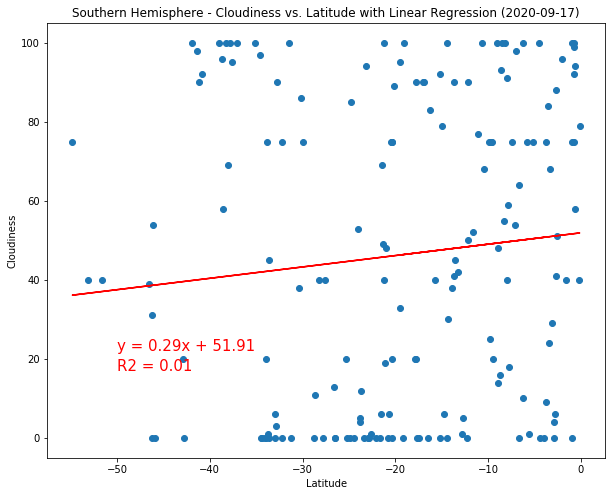

The correlation between Latitude and Cloudiness is: 0.101


In [80]:
# Southern Hemisphere - Cloudiness vs. Latitude Linear Regression

# Data for X-Axis (latitude)
southern_latitude_axis = latitude_south_df.groupby(latitude_south_df["City"])["Latitude"].mean()
southern_latitude_axis

# Data for Y-axis (Cloudiness)
southern_cloudiness_axis = latitude_south_df.groupby(latitude_south_df["City"])["Cloudiness"].mean()
southern_cloudiness_axis

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(southern_latitude_axis, southern_cloudiness_axis)

# Calculate the predictions for each value of x (latitude)
regression_values = southern_latitude_axis * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
plt.figure(figsize=(10,8))
plt.scatter(southern_latitude_axis, southern_cloudiness_axis)

# Plot the regression line
plt.plot(southern_latitude_axis, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-50, 22), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (-50, 17), fontsize=15, color="red")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude with Linear Regression (" + date + ")")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

# Calculate the correlation coefficient
correlation = round(st.pearsonr(southern_latitude_axis, southern_cloudiness_axis)[0],3)
print(f"The correlation between Latitude and Cloudiness is: {correlation}")


In [81]:
# There is no correlation with Cloudiness vs Latitude for the Southern Hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.019


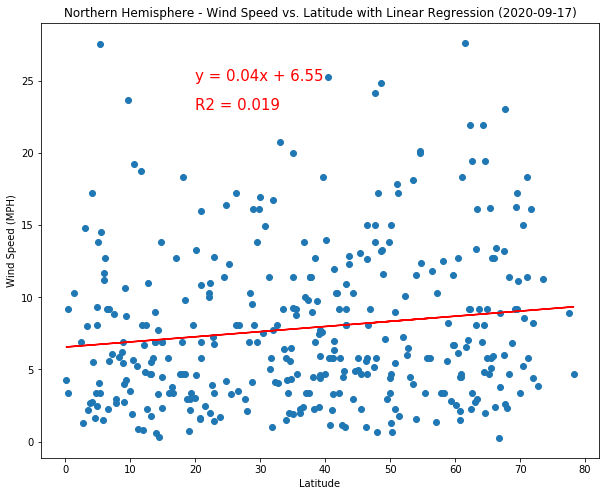

The correlation between Latitude and Wind Speed is: 0.137


In [83]:
# Northern Hemisphere - Wind Speed vs. Latitude Linear Regression

# Data for X-Axis (latitude)
northern_latitude_axis = latitude_north_df.groupby(latitude_north_df["City"])["Latitude"].mean()
northern_latitude_axis

# Data for Y-axis (Wind Speed)
northern_windspeed_axis = latitude_north_df.groupby(latitude_north_df["City"])["Wind Speed"].mean()
northern_windspeed_axis

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(northern_latitude_axis, northern_windspeed_axis)

# Calculate the predictions for each value of x (latitude)
regression_values = northern_latitude_axis * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
plt.figure(figsize=(10,8))
plt.scatter(northern_latitude_axis, northern_windspeed_axis)

# Plot the regression line
plt.plot(northern_latitude_axis, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (20, 25), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (20,23), fontsize=15, color="red")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude with Linear Regression (" + date + ")")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

# Calculate the correlation coefficient
correlation = round(st.pearsonr(northern_latitude_axis, northern_windspeed_axis)[0],3)
print(f"The correlation between Latitude and Wind Speed is: {correlation}")


In [84]:
# There is no correlation with Wind Speed vs Latitude for the Northern Hemisphere. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.082


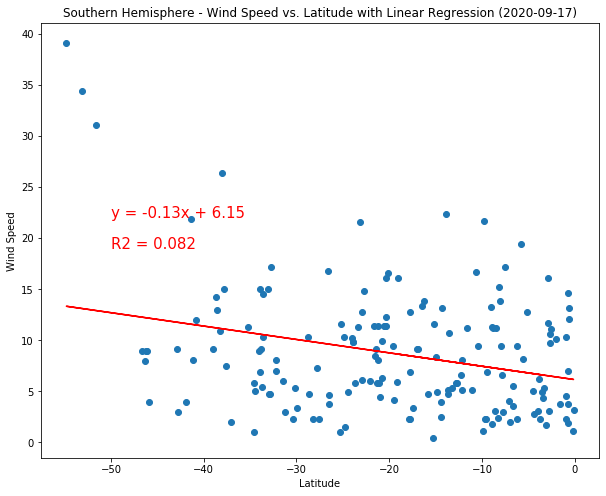

The correlation between Latitude and Wind Speed is: -0.286


In [85]:
# Southern Hemisphere - Wind Speed vs. Latitude Linear Regression

# Data for X-Axis (latitude)
southern_latitude_axis = latitude_south_df.groupby(latitude_south_df["City"])["Latitude"].mean()
southern_latitude_axis

# Data for Y-axis (Wind Speed)
southern_windspeed_axis = latitude_south_df.groupby(latitude_south_df["City"])["Wind Speed"].mean()
southern_windspeed_axis

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(southern_latitude_axis, southern_windspeed_axis)

# Calculate the predictions for each value of x (latitude)
regression_values = southern_latitude_axis * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
plt.figure(figsize=(10,8))
plt.scatter(southern_latitude_axis, southern_windspeed_axis)

# Plot the regression line
plt.plot(southern_latitude_axis, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-50, 22), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (-50, 19), fontsize=15, color="red")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude with Linear Regression (" + date + ")")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

# Calculate the correlation coefficient
correlation = round(st.pearsonr(southern_latitude_axis, southern_windspeed_axis)[0],3)
print(f"The correlation between Latitude and Wind Speed is: {correlation}")


In [86]:
# There is no correlation with Wind Speed vs Latitude for the Southern Hemisphere. 